In [12]:
#Import library
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
No_Data_Path = Path(r"C:\Users\tomti\Desktop\Data Science stuffs\Project Skin cancer\ISIC-2024---Skin-Cancer-Detection-with-3D\data\no")
Yes_Data_Path = Path(r"C:\Users\tomti\Desktop\Data Science stuffs\Project Skin cancer\ISIC-2024---Skin-Cancer-Detection-with-3D\data\yes")

In [3]:
No_Jpg_Path = list(No_Data_Path.glob(r"*.jpg"))
Yes_Jpg_Path = list(Yes_Data_Path.glob(r"*.jpg"))

In [4]:
print(No_Jpg_Path[:5])
print(Yes_Jpg_Path[:5])

[WindowsPath('C:/Users/tomti/Desktop/Data Science stuffs/Project Skin cancer/ISIC-2024---Skin-Cancer-Detection-with-3D/data/no/no0.jpg'), WindowsPath('C:/Users/tomti/Desktop/Data Science stuffs/Project Skin cancer/ISIC-2024---Skin-Cancer-Detection-with-3D/data/no/no1.jpg'), WindowsPath('C:/Users/tomti/Desktop/Data Science stuffs/Project Skin cancer/ISIC-2024---Skin-Cancer-Detection-with-3D/data/no/no10.jpg'), WindowsPath('C:/Users/tomti/Desktop/Data Science stuffs/Project Skin cancer/ISIC-2024---Skin-Cancer-Detection-with-3D/data/no/no100.jpg'), WindowsPath('C:/Users/tomti/Desktop/Data Science stuffs/Project Skin cancer/ISIC-2024---Skin-Cancer-Detection-with-3D/data/no/no1000.jpg')]
[WindowsPath('C:/Users/tomti/Desktop/Data Science stuffs/Project Skin cancer/ISIC-2024---Skin-Cancer-Detection-with-3D/data/yes/y0.jpg'), WindowsPath('C:/Users/tomti/Desktop/Data Science stuffs/Project Skin cancer/ISIC-2024---Skin-Cancer-Detection-with-3D/data/yes/y1.jpg'), WindowsPath('C:/Users/tomti/Deskt

In [5]:
# Initialize a list containning blending both 2 classes
Yes_No_list = []
for no_jpg in No_Jpg_Path:
    Yes_No_list.append(no_jpg)
    
for yes_jpg in Yes_Jpg_Path:
    Yes_No_list.append(yes_jpg)

In [6]:
# Create labels for image
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Yes_No_list))
# Counting the number of Tumor/Non-Tumor images
print("No counting: ", JPG_Labels.count("no"))
print("Yes counting: ", JPG_Labels.count("yes"))

No counting:  1500
Yes counting:  1500


In [8]:

JPG_Path_Series = pd.Series(Yes_No_list, name = "jpg").astype(str)
JPG_Category_Series = pd.Series(JPG_Labels, name = "TUMOR_CATEGORY")
print(JPG_Path_Series[:5])
print(JPG_Category_Series[:5])

0    C:\Users\tomti\Desktop\Data Science stuffs\Pro...
1    C:\Users\tomti\Desktop\Data Science stuffs\Pro...
2    C:\Users\tomti\Desktop\Data Science stuffs\Pro...
3    C:\Users\tomti\Desktop\Data Science stuffs\Pro...
4    C:\Users\tomti\Desktop\Data Science stuffs\Pro...
Name: jpg, dtype: object
0    no
1    no
2    no
3    no
4    no
Name: TUMOR_CATEGORY, dtype: object


In [9]:
Main_Train_Data = pd.concat([JPG_Path_Series, JPG_Category_Series], axis = 1)
print(Main_Train_Data.head(-1))


                                                    jpg TUMOR_CATEGORY
0     C:\Users\tomti\Desktop\Data Science stuffs\Pro...             no
1     C:\Users\tomti\Desktop\Data Science stuffs\Pro...             no
2     C:\Users\tomti\Desktop\Data Science stuffs\Pro...             no
3     C:\Users\tomti\Desktop\Data Science stuffs\Pro...             no
4     C:\Users\tomti\Desktop\Data Science stuffs\Pro...             no
...                                                 ...            ...
2994  C:\Users\tomti\Desktop\Data Science stuffs\Pro...            yes
2995  C:\Users\tomti\Desktop\Data Science stuffs\Pro...            yes
2996  C:\Users\tomti\Desktop\Data Science stuffs\Pro...            yes
2997  C:\Users\tomti\Desktop\Data Science stuffs\Pro...            yes
2998  C:\Users\tomti\Desktop\Data Science stuffs\Pro...            yes

[2999 rows x 2 columns]


In [10]:
# Do the same with Prediction Path
Prediction_Path = Path(r"C:\Users\tomti\Desktop\Data Science stuffs\Project Skin cancer\ISIC-2024---Skin-Cancer-Detection-with-3D\data\pred")
Test_JPG_Path = list(Prediction_Path.glob(r"*.jpg"))
print(Test_JPG_Path[:5])
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))
print(Test_JPG_Labels[:5])
Test_JPG_Path_Series = pd.Series(Test_JPG_Path, name = "jpg").astype(str)
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels, name = "TUMOR_CATEGORY")
Test_Data = pd.concat([Test_JPG_Path_Series, Test_JPG_Labels_Series], axis = 1)
print(Test_Data.head())

[WindowsPath('C:/Users/tomti/Desktop/Data Science stuffs/Project Skin cancer/ISIC-2024---Skin-Cancer-Detection-with-3D/data/pred/pred0.jpg'), WindowsPath('C:/Users/tomti/Desktop/Data Science stuffs/Project Skin cancer/ISIC-2024---Skin-Cancer-Detection-with-3D/data/pred/pred1.jpg'), WindowsPath('C:/Users/tomti/Desktop/Data Science stuffs/Project Skin cancer/ISIC-2024---Skin-Cancer-Detection-with-3D/data/pred/pred10.jpg'), WindowsPath('C:/Users/tomti/Desktop/Data Science stuffs/Project Skin cancer/ISIC-2024---Skin-Cancer-Detection-with-3D/data/pred/pred11.jpg'), WindowsPath('C:/Users/tomti/Desktop/Data Science stuffs/Project Skin cancer/ISIC-2024---Skin-Cancer-Detection-with-3D/data/pred/pred12.jpg')]
['pred', 'pred', 'pred', 'pred', 'pred']
                                                 jpg TUMOR_CATEGORY
0  C:\Users\tomti\Desktop\Data Science stuffs\Pro...           pred
1  C:\Users\tomti\Desktop\Data Science stuffs\Pro...           pred
2  C:\Users\tomti\Desktop\Data Science stuffs\

In [11]:
# Shuffling the data to random order
Main_Train_Data = Main_Train_Data.sample(frac = 1).reset_index(drop = True)
print(Main_Train_Data.head(-1))

                                                    jpg TUMOR_CATEGORY
0     C:\Users\tomti\Desktop\Data Science stuffs\Pro...             no
1     C:\Users\tomti\Desktop\Data Science stuffs\Pro...             no
2     C:\Users\tomti\Desktop\Data Science stuffs\Pro...            yes
3     C:\Users\tomti\Desktop\Data Science stuffs\Pro...            yes
4     C:\Users\tomti\Desktop\Data Science stuffs\Pro...             no
...                                                 ...            ...
2994  C:\Users\tomti\Desktop\Data Science stuffs\Pro...            yes
2995  C:\Users\tomti\Desktop\Data Science stuffs\Pro...            yes
2996  C:\Users\tomti\Desktop\Data Science stuffs\Pro...             no
2997  C:\Users\tomti\Desktop\Data Science stuffs\Pro...            yes
2998  C:\Users\tomti\Desktop\Data Science stuffs\Pro...             no

[2999 rows x 2 columns]


# Visualization

Text(0.5, 1.0, 'yes')

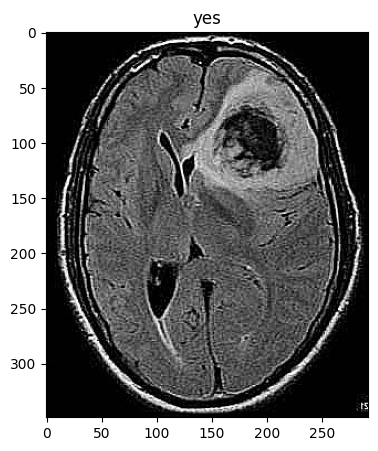

In [13]:
#We try visualizing a "Yes" image
figure = plt.figure(figsize=(5,5))
plt.imshow(plt.imread(Main_Train_Data["jpg"][2]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][2])

Text(0.5, 1.0, 'no')

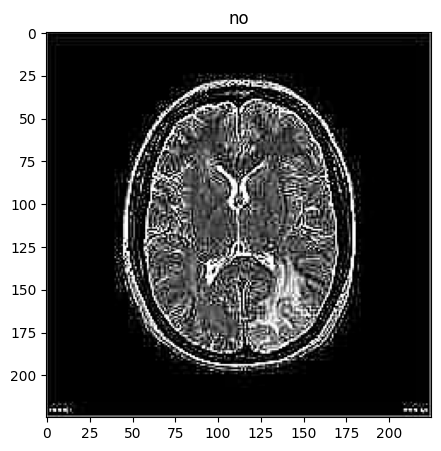

In [16]:
# Visualize a "No" image
figure = plt.figure(figsize=(5,5))
plt.imshow(plt.imread(Main_Train_Data["jpg"][1]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][1])

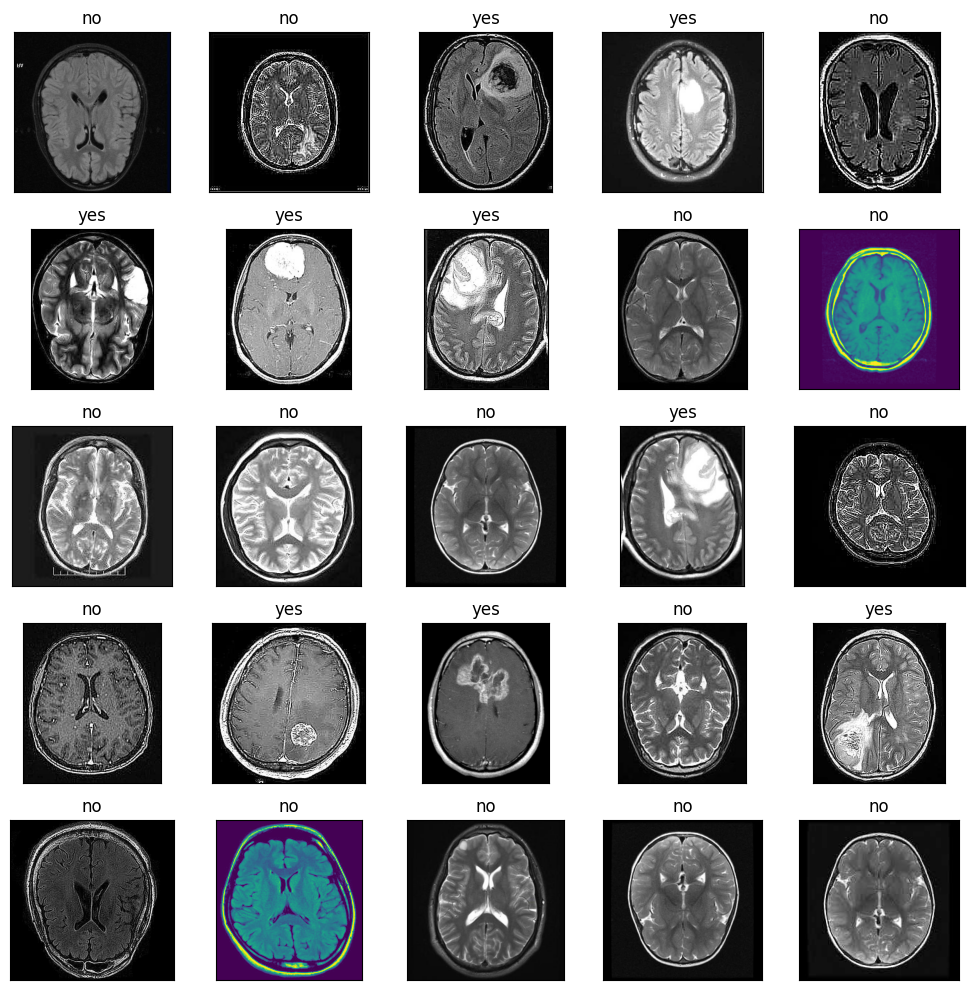

In [18]:
#Visualizing 25 random images
fig, axes = plt.subplots(nrows=5,ncols=5, figsize= (10,10),subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Train_Data["jpg"][i]))
    ax.set_title(Main_Train_Data['TUMOR_CATEGORY'][i])
plt.tight_layout()
plt.show()